In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gen_w(ins, outs):
  res = np.zeros((63, 15))
  for i, v in enumerate(ins):
    res += np.matmul(v.flatten()[np.newaxis].T ,outs[i].flatten().reshape(1, -1))
  return res

### define inputs and outputs

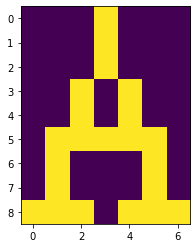

In [3]:
ins0 = [[-1,-1,-1,1,-1,-1,-1], [-1,-1,-1,1,-1,-1,-1], [-1,-1,-1,1,-1,-1,-1],
       [-1,-1,1,-1,1,-1,-1], [-1,-1,1,-1,1,-1,-1], [-1,1,1,1,1,1,-1],
       [-1,1,-1,-1,-1,1,-1], [-1,1,-1,-1,-1,1,-1], [1,1,1,-1,1,1,1]]

plt.imshow(np.array(ins0))


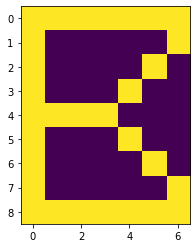

In [4]:
ins1 = [[1,1,1,1,1,1,1], [1,-1,-1,-1,-1,-1,1], [1,-1,-1,-1,-1,1,-1],
       [1,-1,-1,-1,1,-1,-1], [1,1,1,1,-1,-1,-1], [1,-1,-1,-1,1,-1,-1],
       [1,-1,-1,-1,-1,1,-1], [1,-1,-1,-1,-1,-1,1], [1,1,1,1,1,1,1]]

plt.imshow(np.array(ins1))


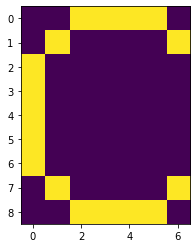

In [5]:
ins2 = [[-1,-1,1,1,1,1,-1], [-1,1,-1,-1,-1,-1,1], [1,-1,-1,-1,-1,-1,-1],
       [1,-1,-1,-1,-1,-1,-1], [1,-1,-1,-1,-1,-1,-1], [1,-1,-1,-1,-1,-1,-1],
       [1,-1,-1,-1,-1,-1,-1], [-1,1,-1,-1,-1,-1,1], [-1,-1,1,1,1,1,-1]]

plt.imshow(np.array(ins2))


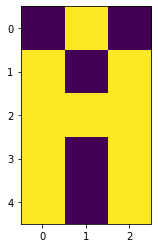

In [6]:
outs0 = [[-1,1,-1], [1,-1,1], [1,1,1], [1,-1,1], [1,-1,1]]

plt.imshow(np.array(outs0))


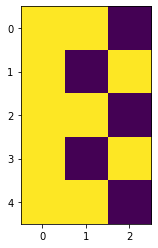

In [7]:
outs1 = [[1,1,-1], [1,-1,1], [1,1,-1], [1,-1,1], [1,1,-1]]

plt.imshow(np.array(outs1))


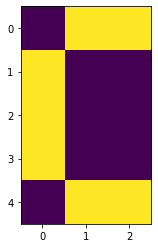

In [8]:
outs2 = [[-1,1,1], [1,-1,-1], [1,-1,-1], [1,-1,-1], [-1,1,1]]

plt.imshow(np.array(outs2))


In [9]:
outs = [outs0, outs1, outs2]
ins = [ins0, ins1, ins2]

ins = np.array(ins)
outs = np.array(outs)

### learn w matrix

In [10]:
w = gen_w(ins, outs)

In [11]:
def sign(inp):
  res = []

  for i in inp[0]:
    if i >= 0:
      res.append(1)
    else:
      res.append(-1)

  return np.array(res)

### model can create correct output from inputs without noise

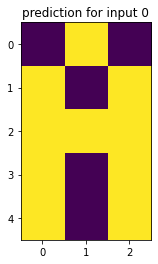

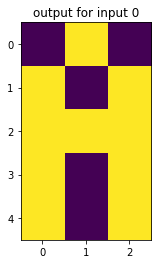

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
True


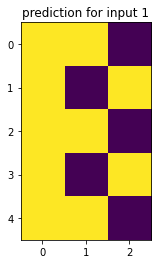

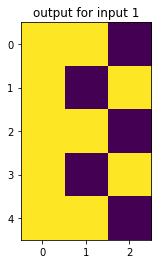

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
True


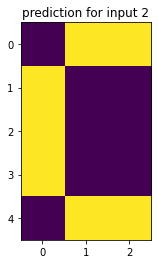

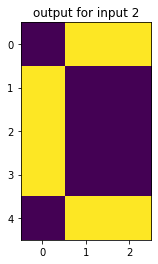

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
True


In [12]:
for i in range(len(ins)):
  pred = sign(np.matmul(ins[i].reshape(1,-1), w)).reshape(5, 3)
  plt.imshow(pred)
  plt.title('prediction for input '+str(i))
  plt.show()

  plt.imshow(outs[i])
  plt.title('output for input '+str(i))
  plt.show()

  print(pred == outs[i])
  print(np.all(pred == outs[i]))

### add noise 10% and 25%

In [13]:
def add_noise(inp, p):
  ids = np.random.choice(len(inp[0]), int(len(inp[0])*p)+1)
  inp_c = inp.copy()
  for i in ids:
    inp_c[0][i] += float((-2*inp_c[0][i])/np.abs(inp_c[0][i]))
  return inp_c

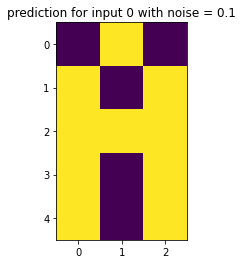

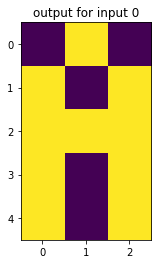

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
True


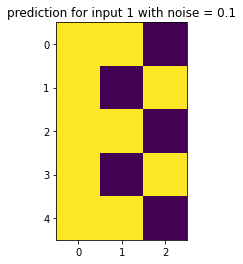

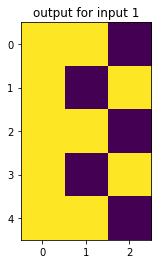

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
True


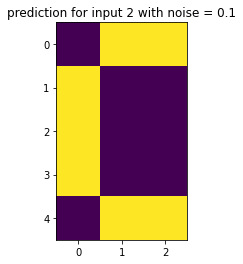

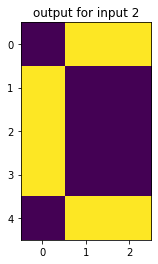

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
True


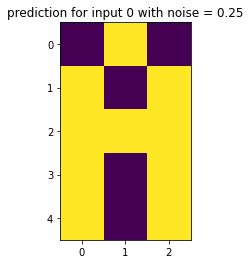

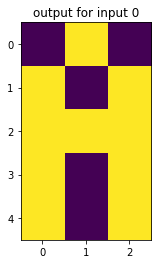

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
True


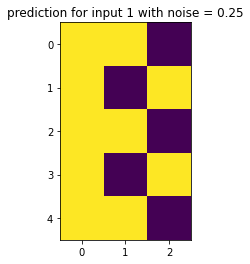

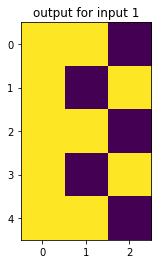

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
True


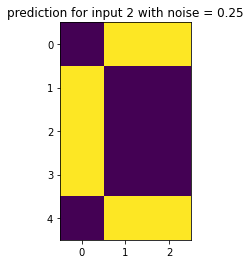

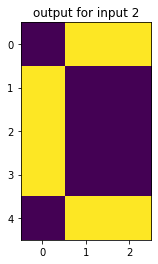

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
True


In [14]:
ps = [0.1, 0.25]
for p in ps:
  for i in range(len(ins)):
    pred = sign(np.matmul(add_noise(ins[i].reshape(1,-1), p), w)).reshape(5, 3)
    plt.imshow(pred)
    plt.title('prediction for input '+str(i)+' with noise = '+str(p))
    plt.show()

    plt.imshow(outs[i])
    plt.title('output for input '+str(i))
    plt.show()

    print(pred == outs[i])
    print(np.all(pred == outs[i]))

### sucess rate for all states with noise

In [15]:
ps = [0.1, 0.25]

accs = []

for p in ps:
  for i in range(len(ins)):
    acc = 0
    for r in range(1000):
      pred = sign(np.matmul(add_noise(ins[i].reshape(1,-1), p), w)).reshape(5, 3)
      acc += int(np.all(pred == outs[i]))
    accs.append({'input':i, 'p_noise':p, 'num of correct':acc, 'rate of correct':acc/1000})

for i in accs:
  print(i)

{'input': 0, 'p_noise': 0.1, 'num of correct': 1000, 'rate of correct': 1.0}
{'input': 1, 'p_noise': 0.1, 'num of correct': 1000, 'rate of correct': 1.0}
{'input': 2, 'p_noise': 0.1, 'num of correct': 999, 'rate of correct': 0.999}
{'input': 0, 'p_noise': 0.25, 'num of correct': 997, 'rate of correct': 0.997}
{'input': 1, 'p_noise': 0.25, 'num of correct': 967, 'rate of correct': 0.967}
{'input': 2, 'p_noise': 0.25, 'num of correct': 968, 'rate of correct': 0.968}


### remove some input 10% and 25%

In [16]:
def rmp(inp, p):
  ids = np.random.choice(len(inp[0]), int(len(inp[0])*p)+1)
  inp_c = inp.copy()
  for i in ids:
    inp_c[0][i] = 0
  return inp_c

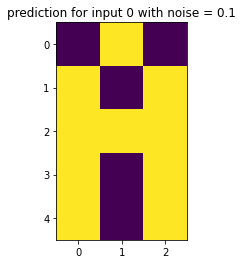

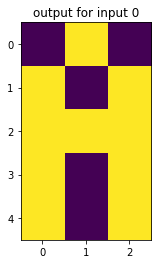

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
True


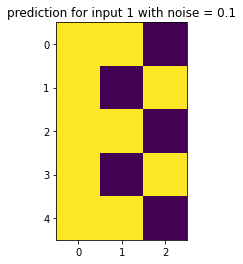

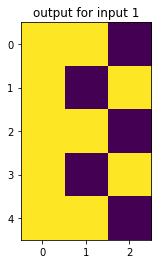

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
True


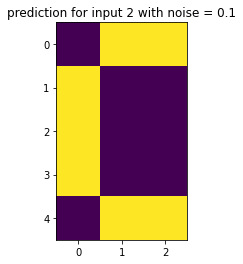

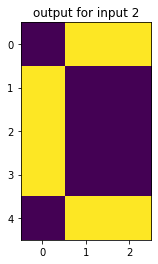

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
True


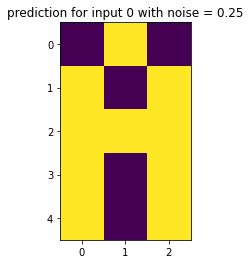

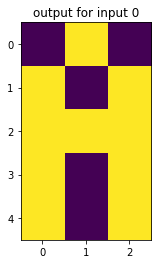

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
True


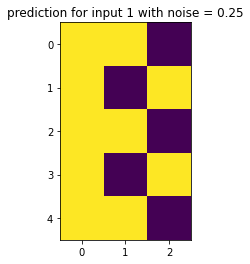

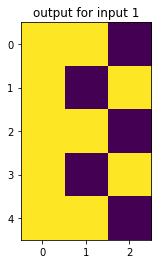

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
True


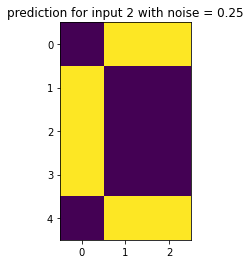

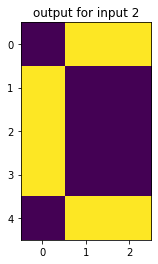

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
True


In [17]:
ps = [0.1, 0.25]
for p in ps:
  for i in range(len(ins)):
    pred = sign(np.matmul(rmp(ins[i].reshape(1,-1), p), w)).reshape(5, 3)
    plt.imshow(pred)
    plt.title('prediction for input '+str(i)+' with noise = '+str(p))
    plt.show()

    plt.imshow(outs[i])
    plt.title('output for input '+str(i))
    plt.show()

    print(pred == outs[i])
    print(np.all(pred == outs[i]))

### sucess rate for all states with removing

In [18]:
ps = [0.1, 0.25]

accs = []

for p in ps:
  for i in range(len(ins)):
    acc = 0
    for r in range(1000):
      pred = sign(np.matmul(rmp(ins[i].reshape(1,-1), p), w)).reshape(5, 3)
      acc += int(np.all(pred == outs[i]))
    accs.append({'input':i, 'p_remove':p, 'num of correct':acc, 'rate of correct':acc/1000})

for i in accs:
  print(i)

{'input': 0, 'p_remove': 0.1, 'num of correct': 1000, 'rate of correct': 1.0}
{'input': 1, 'p_remove': 0.1, 'num of correct': 1000, 'rate of correct': 1.0}
{'input': 2, 'p_remove': 0.1, 'num of correct': 1000, 'rate of correct': 1.0}
{'input': 0, 'p_remove': 0.25, 'num of correct': 1000, 'rate of correct': 1.0}
{'input': 1, 'p_remove': 0.25, 'num of correct': 1000, 'rate of correct': 1.0}
{'input': 2, 'p_remove': 0.25, 'num of correct': 1000, 'rate of correct': 1.0}
